1/1 [==============================] - 0s 123ms/step


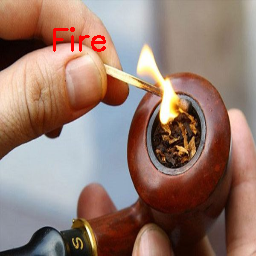

In [5]:
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches

# Load the saved model
model = tf.keras.models.load_model('fire.h5')

# Function to predict fire in an image and display it
def predict_and_display_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    prediction = model.predict(img)

    # Determine the label text and color
    if prediction[0][0] < 0.5:
        label_text = "Fire"
        color = (0, 0, 255)  # Red for fire
    else:
        label_text = "No fire"
        color = (0, 255, 0)  # Green for no fire

    # Convert the image data to the correct format for cv2_imshow
    img = (img * 255).astype(np.uint8)

    # Display the result on the image using cv2_imshow
    cv2.putText(img[0], label_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2_imshow(img[0])  # Use cv2_imshow to display the image

# Test the image prediction function and display the result on the image
image_path = '/content/kinh-nghiem-cham-lua-cho-tau-thuoc-la-soi-1.jpg'
predict_and_display_image(image_path)
